In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings(action="ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('../data/processed/clean_df.csv')

In [3]:
# add cleaning to previous notebook

df['Num_words_text'] = df['clean_txt_emoji_lemma'].apply(lambda x:len(str(x).split()))
nw_df =df[df['Num_words_text'] > 2]
nw_df

,Unnamed: 0,tweet_text,cyberbullying_type,profanity_list,hashtags,mentions,emoji_face,emoji_names,clean_txt,clean_txt_emoji,clean_txt_emoji_lemma,Num_words_text
0,0,"In other words #katandandre, your food was cra...",not_cyberbullying,NaN,katandandre mkr,NaN,NaN,NaN,"In other words , your food was crapilicious!",words food crapilicious,word food crapilicious,3
2,2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,NaN,NaN,XochitlSuckkks,NaN,NaN,classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcakes,classy whore red velvet cupcakes,5
3,3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,NaN,NaN,Jason_Gio,NaN,NaN,"meh. :P thanks for the heads up, but not too ...",meh thanks heads concerned another angry dude ...,meh thank head concern another angry dude twitter,8
4,4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,NaN,NaN,RudhoeEnglish,NaN,NaN,This ISIS account pretending Kurdish account....,isis account pretending kurdish account like i...,isis account pretend kurdish account like isla...,8
5,5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,NaN,NaN,Raja5aab Quickieleaks,NaN,NaN,"Yes, the test god that good bad indifferent ...",yes test god good bad indifferent weird whatev...,yes test god good bad indifferent weird whatev...,11
...,...,...,...,...,...,...,...,...,...,...,...,...
47687,47687,"Black ppl aren't expected to do anything, depe...",ethnicity,NaN,NaN,NaN,NaN,NaN,"Black ppl aren't expected anything, depended f...",black ppl expected anything depended anything ...,black ppl expect anything depend anything yet ...,21
47688,47688,Turner did not withhold his disappointment. Tu...,ethnicity,negro,NaN,NaN,NaN,NaN,Turner did not withhold his disappointment. Tu...,turner withhold disappointment turner called c...,turner withhold disappointment turner call cou...,30
47689,47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,nigger,NaN,NaN,NaN,NaN,I swear God. This dumb nigger bitch. I have go...,swear god dumb nigger bitch got bleach hair re...,swear god dumb nigger bitch get bleach hair re...,12
47690,47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,fuck,NaN,therealexel,NaN,NaN,Yea fuck you RT : IF YOURE A NIGGER FUCKING UN...,yea fuck youre nigger fucking unfollow fucking...,yea fuck youre nigger fuck unfollow fuck dumb ...,9


In [6]:
df_eda = df[['cyberbullying_type', 'clean_txt_emoji_lemma', 'Num_words_text', 'profanity_list', 'hashtags']]


- word cloud for each cyberbullying
- profanity bar plot for each cyberbullying
- number of words for each cyberbullying
- 


In [7]:
df_eda.head()

,cyberbullying_type,clean_txt_emoji_lemma,Num_words_text,profanity_list,hashtags
0,not_cyberbullying,word food crapilicious,3,NaN,katandandre mkr
1,not_cyberbullying,white,1,NaN,aussietv MKR theblock ImACelebrityAU today sun...
2,not_cyberbullying,classy whore red velvet cupcakes,5,NaN,NaN
3,not_cyberbullying,meh thank head concern another angry dude twitter,8,NaN,NaN
4,not_cyberbullying,isis account pretend kurdish account like isla...,8,NaN,NaN


In [37]:
df_eda['profanity_list'] = df_eda['profanity_list'].astype('str')
profanity = df_eda[df_eda['profanity_list'] != "nan"]

In [26]:
# npercentage of entires that had non profanity

profanity_len = len(profanity )
percent_profanity = (profanity_len/len(df_eda) )* 100
percent_profanity 

29.589868321731107

In [38]:
#= df[(df.origin == "JFK") & (df.carrier == "B6")]
profanity.query('cyberbullying_type == "age"')['profanity_list']

31743         ti
31746    fucking
31751     wedgie
31753      dicks
31755    suicide
          ...   
39687       crap
39703       shit
39705        ass
39722     bitchy
39726      naked
Name: profanity_list, Length: 1442, dtype: object

In [82]:
from collections import Counter
def profanity_bar(label):
   #labels = list(df_eda['cyberbullying_type'].unique())
   count_obj = profanity.query(f'cyberbullying_type == "{label}"')['profanity_list'].apply(lambda x: Counter(x.split(" "))).agg(sum).most_common(20)
   df = pd.DataFrame(count_obj, columns=['Words', f'{label}'])
   df.index = df['Words']
   print(f'Bar plot of {label} label')
   return df.plot.bar();

Bar plot of not_cyberbullying label


<AxesSubplot:xlabel='Words'>

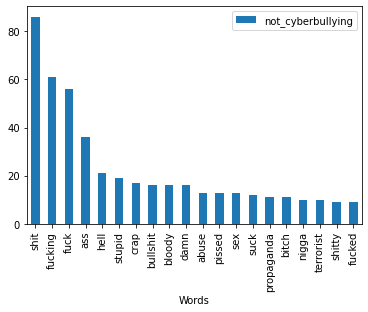

In [83]:
labels = list(df_eda['cyberbullying_type'].unique())
profanity_bar(labels[0])



Bar plot of gender label


<AxesSubplot:xlabel='Words'>

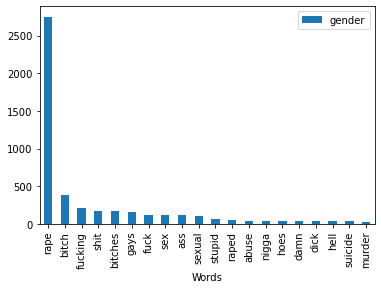

In [84]:
profanity_bar(labels[1])

Bar plot of religion label


<AxesSubplot:xlabel='Words'>

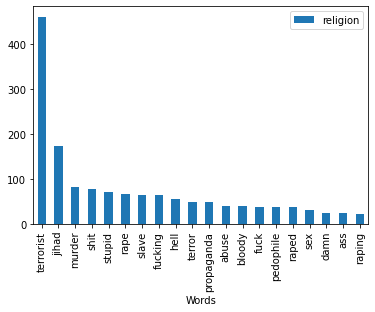

In [85]:

profanity_bar(labels[2])


Bar plot of other_cyberbullying label


<AxesSubplot:xlabel='Words'>

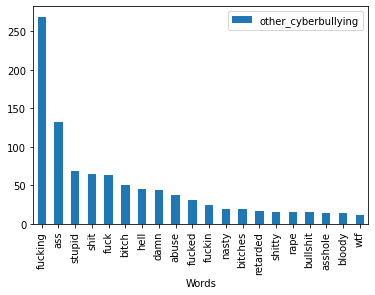

In [86]:
profanity_bar(labels[3])


Bar plot of age label


<AxesSubplot:xlabel='Words'>

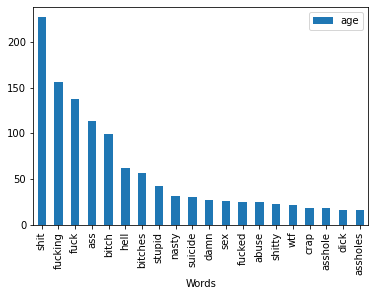

In [87]:
profanity_bar(labels[4])


Bar plot of ethnicity label


<AxesSubplot:xlabel='Words'>

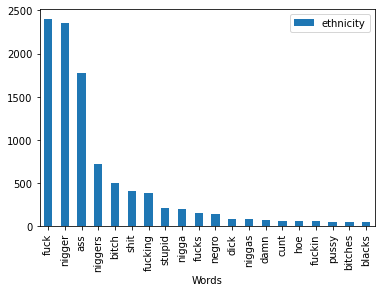

In [88]:
profanity_bar(labels[5])